- Author: Paul Daniel Pop
- NIU: 1607129
- Github: https://github.com/Paul-DanielPop/Kaggle-Mushroom-Classification 

# Mushroom Classification Problem

This problem involves predicting whether a given mushroom is edible or poisonous based on its physical characteristics.

Atributte information:

- cap-shape: bell = b, conical = c, convex = x, flat = f, knobbed = k, sunken = s
- cap-surface: fibrous = f, glossy = y, scaly = k, smooth = s
- cap-color: brown = n, buff = e, cinnamon = c, gray = g, green = r, pink = p, purple = u, red = e, white = w, yellow = y
- bruises: bruises = t, no = n
- odor: almond = a, anise = l, creosote = c, fishy = y, foul = f, musty = m, none = n, pungent = p, spicy = s
- gill-attachment: attached = a, descending = d, free = f, notched = n
- gill-spacing: close = c, crowded = w
- gill-size: broad = b, narrow = n
- gill-color: black = k, brown = n, buff = b, chocolate = h, gray = g, green = r, orange = o, pink = p, purple = u, red = e, white = w, yellow = y
- stalk-shape: enlarging = e, tapering = t
- stalk-root: bulbous = b, club = c, cup = u, equal = e, rhizomorphs = z, rooted = r, missing = ?
- stalk-surface-above-ring: fibrous = f, scaly = y, silky = k, smooth = s
- stalk-surface-below-ring: fibrous = f, scaly = y, silky = k, smooth = s
- stalk-color-above-ring: brown = n, buff = b, cinnamon = c, gray = g, orange = o, pink = p, red = e, white = w, yellow = y
- stalk-color-below-ring: brown = n, buff = b, cinnamon = c, gray = g, orange = o, pink = p, red = e, white = w, yellow = y
- veil-type: partial = p, universal = u
- veil-color: brown = n, orange = o, white = w, yellow = y
- ring-number: none = n, one = o, two = t
- ring-type: cobwebby = c, evanescent = e, flaring = f, large = l, none = n, pendant = p, sheathing = s, zone = z
- spore-print-color: black = k, brown = n, buff = b, chocolate = h, green = r, orange = o, purple = u, red = e, white = w, yellow = y
- population: abundant = a, clustered = c, numerous = n, scattered = s, several = v, solitary = y
- habitat: grasses = g, leaves = l, meadows = m, paths = p, urban = u, waste = w, woods = d

In [21]:
import pandas as pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pandas.read_csv('data/mushrooms.csv')

print(f'Data set shape is: {df.shape}')

df.head()


Data set shape is: (8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [23]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


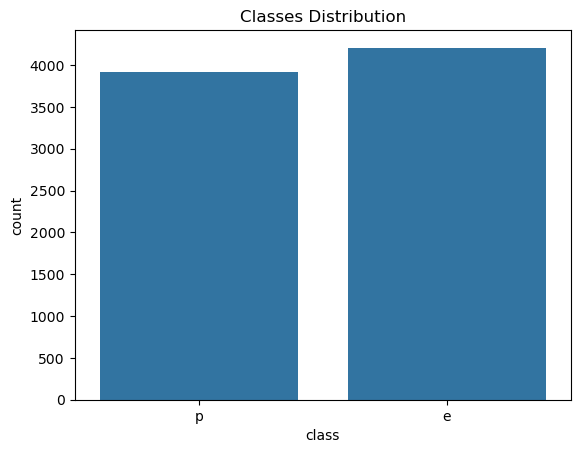

In [24]:
sns.countplot(x='class', data=df)
plt.title('Classes Distribution')
plt.show()

Target class is pretty balanced, so we can use accuracy as our evaluation metric without worrying about non-representative results.

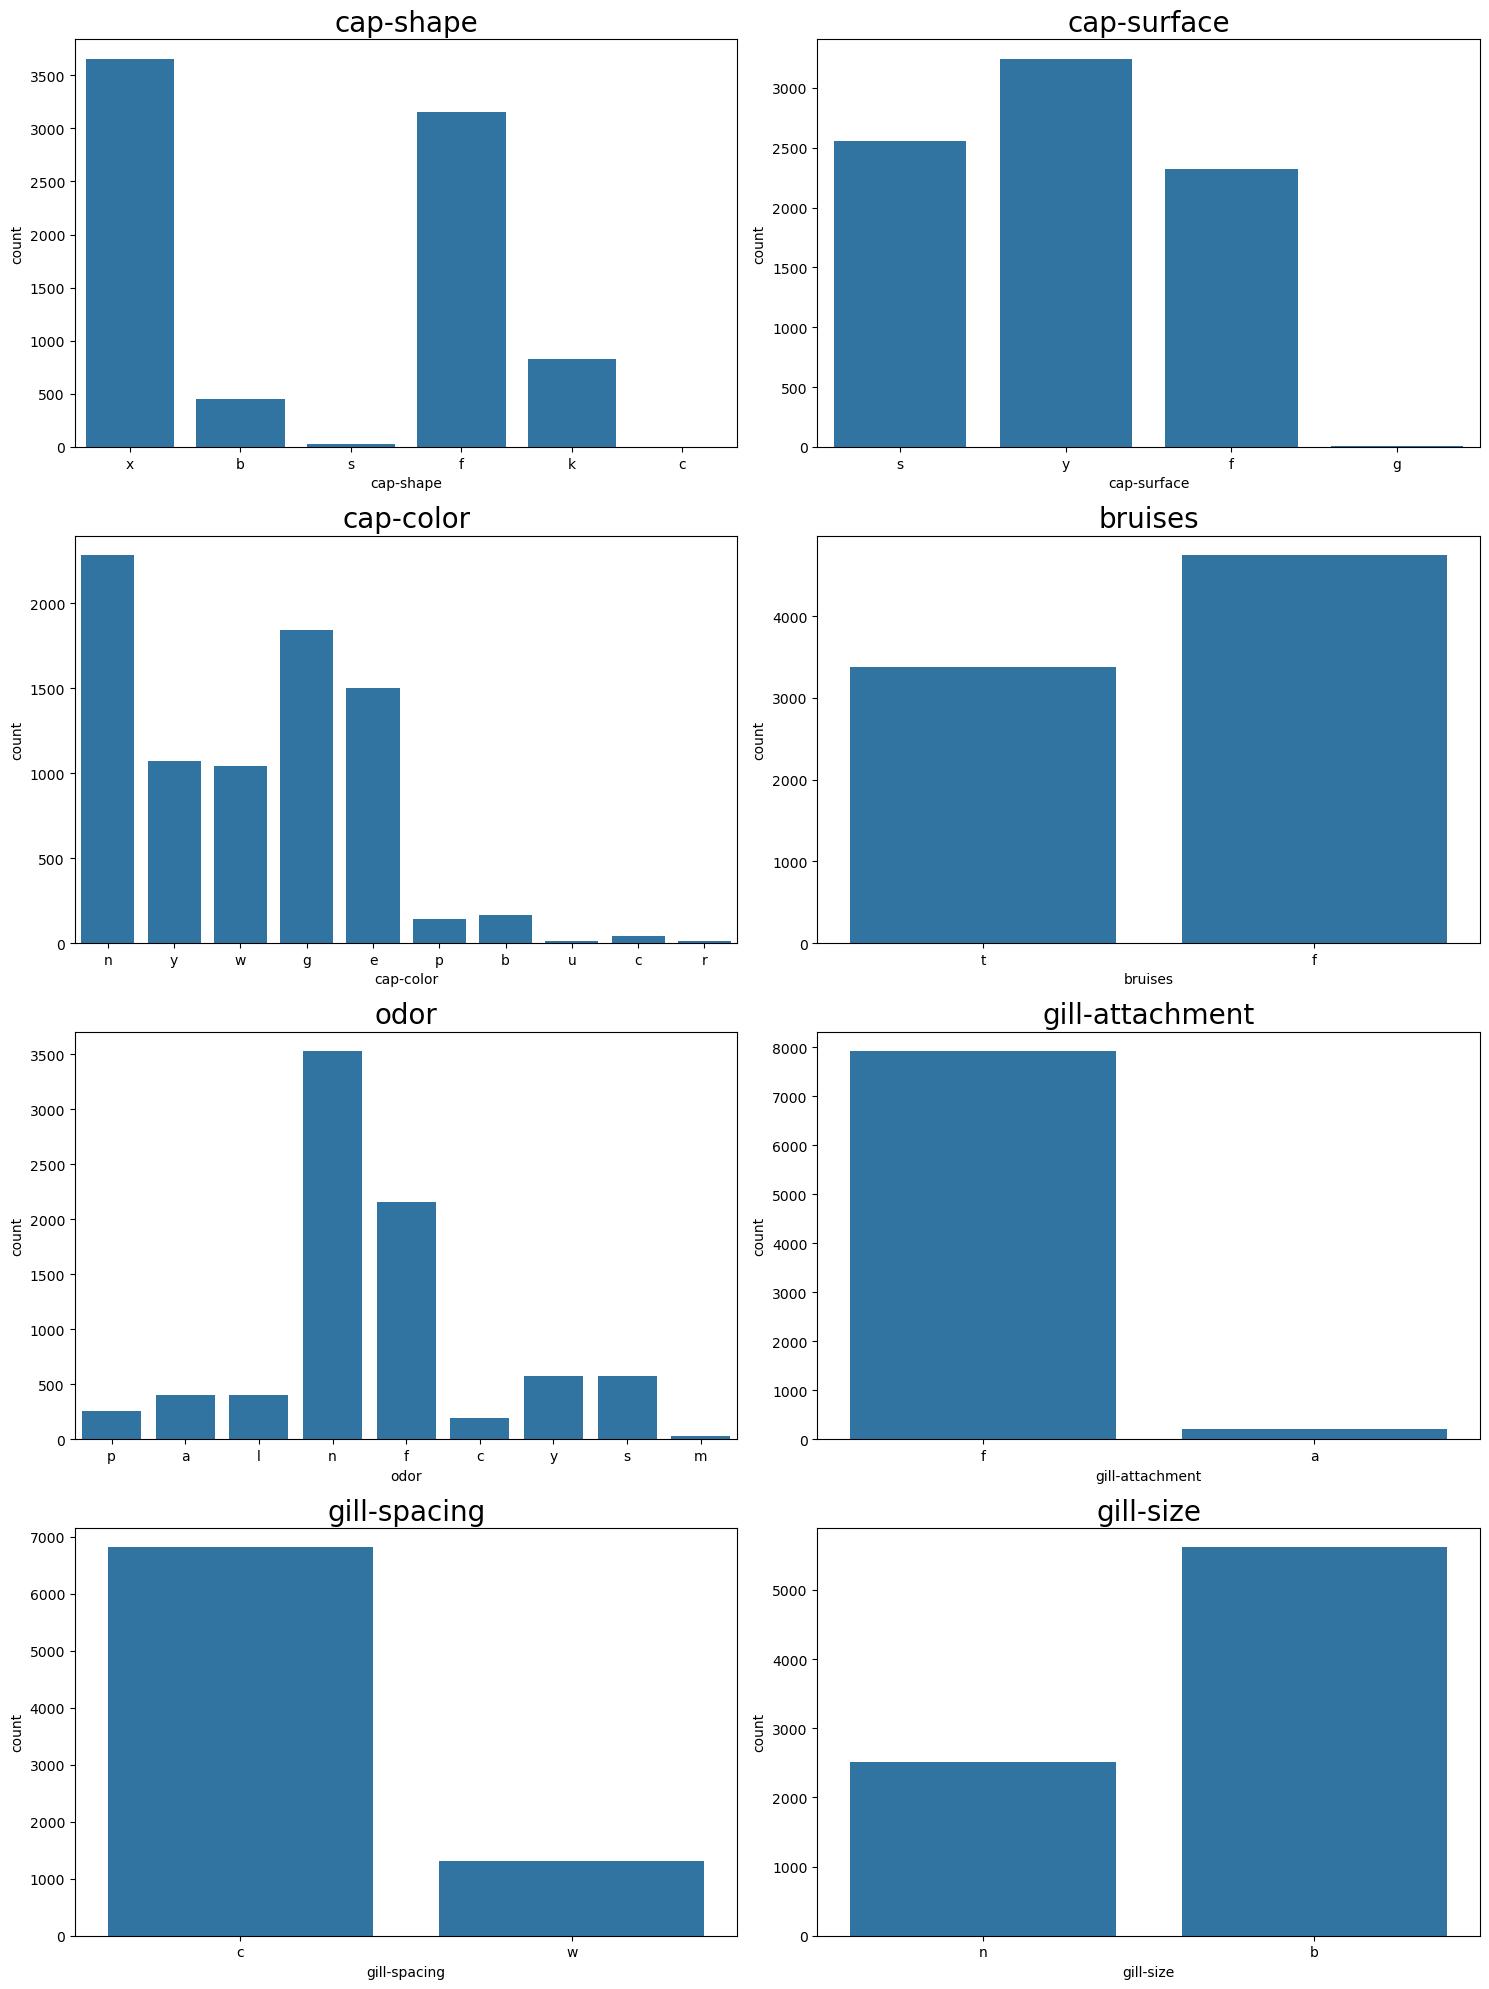

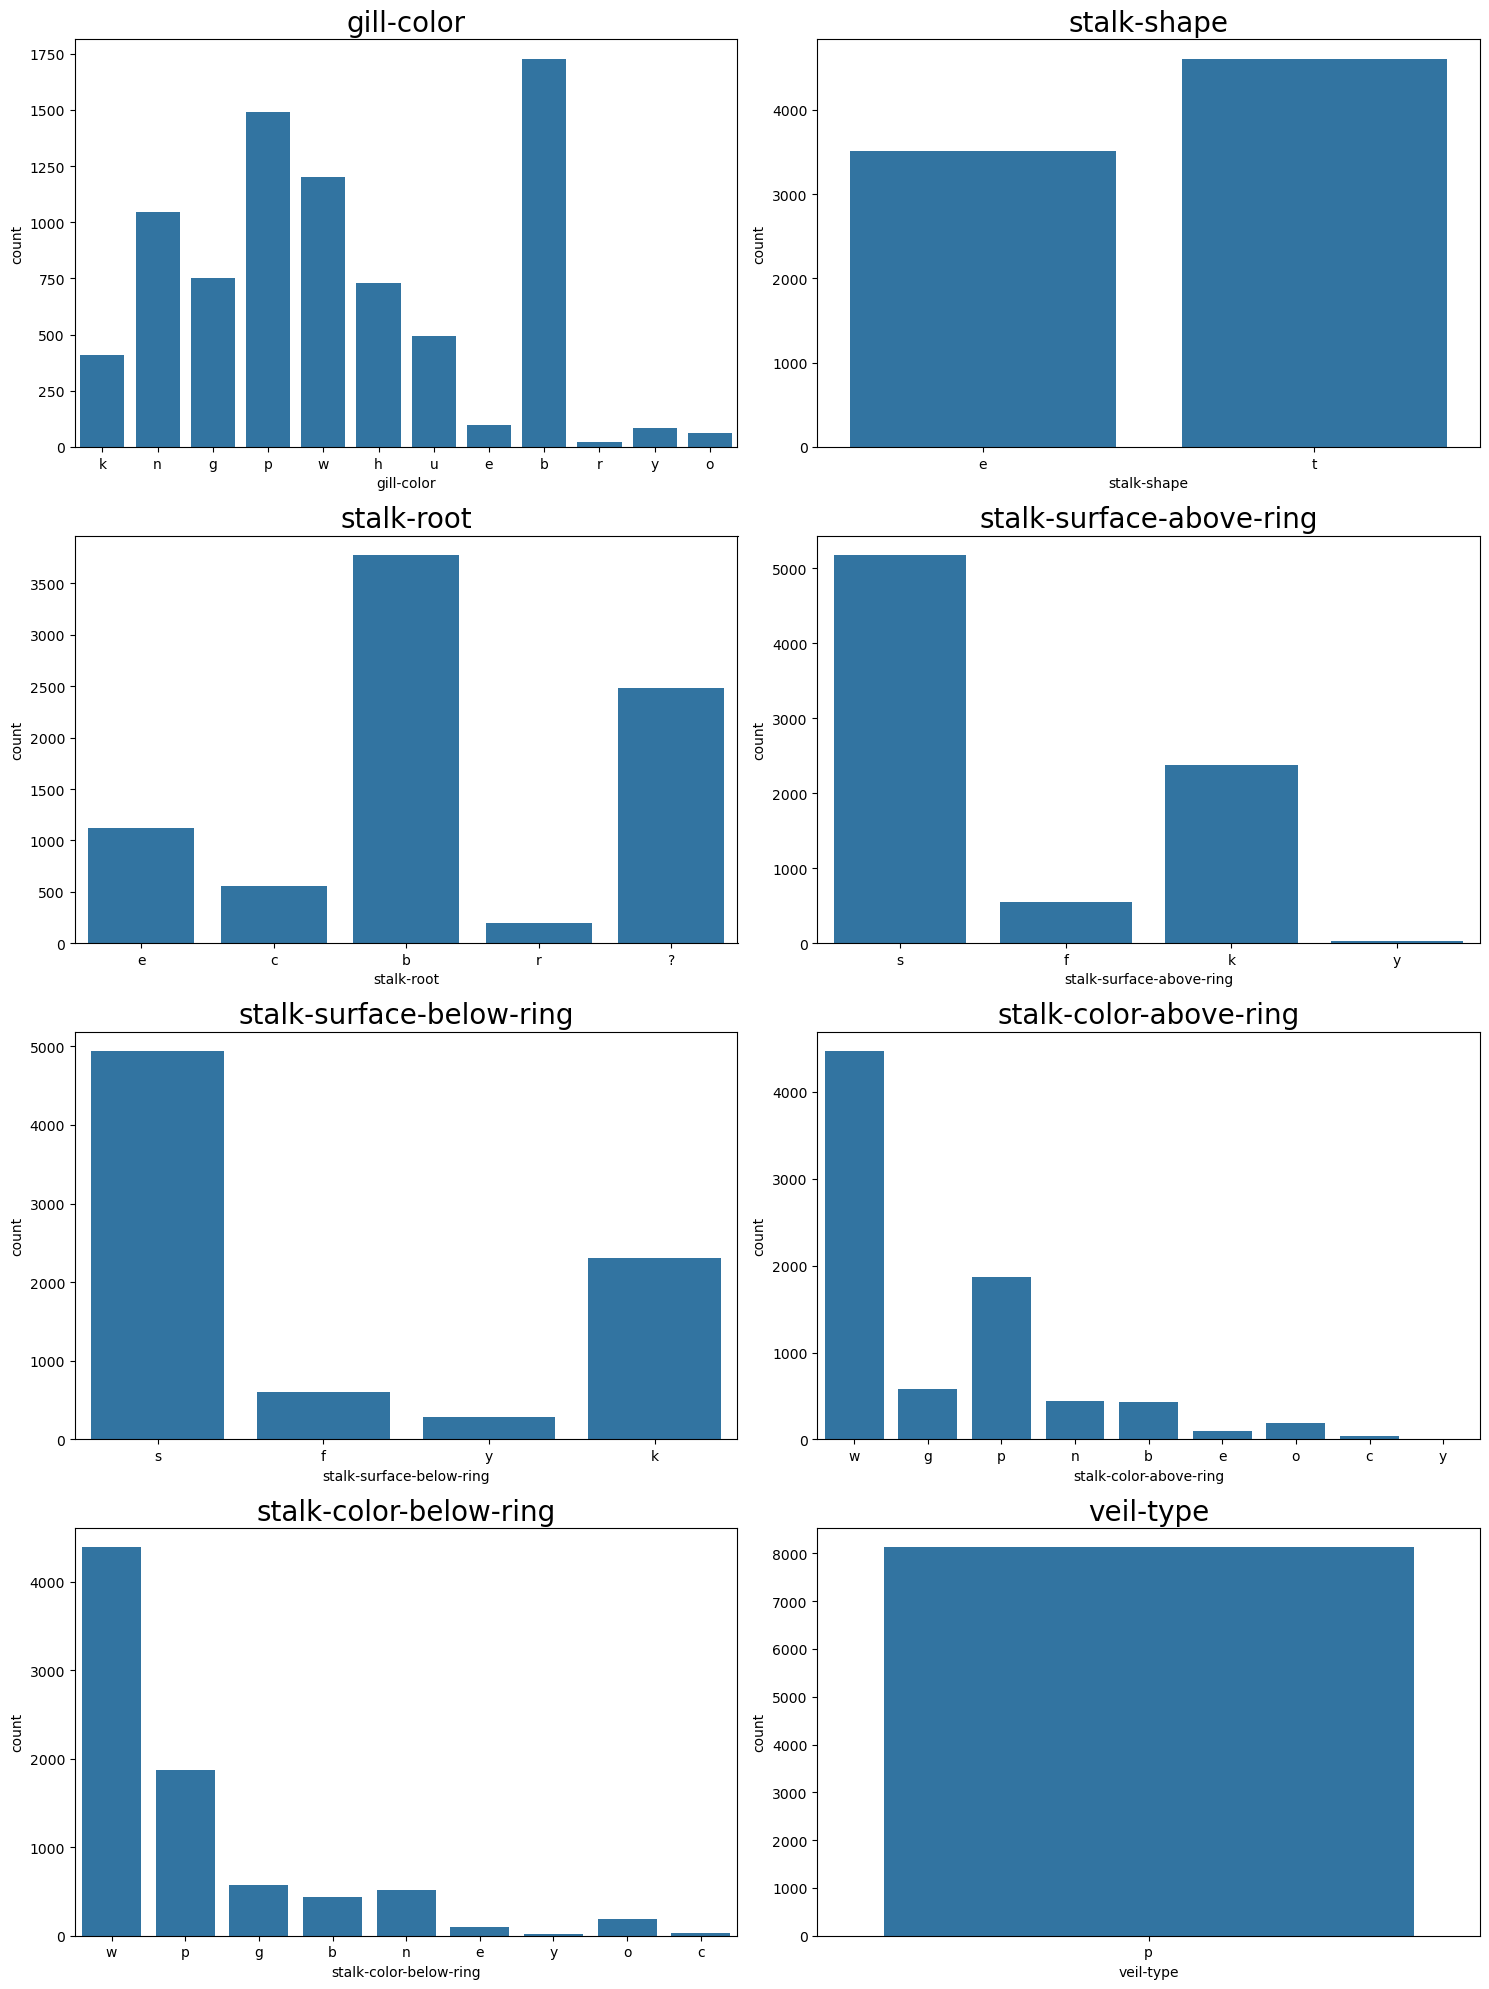

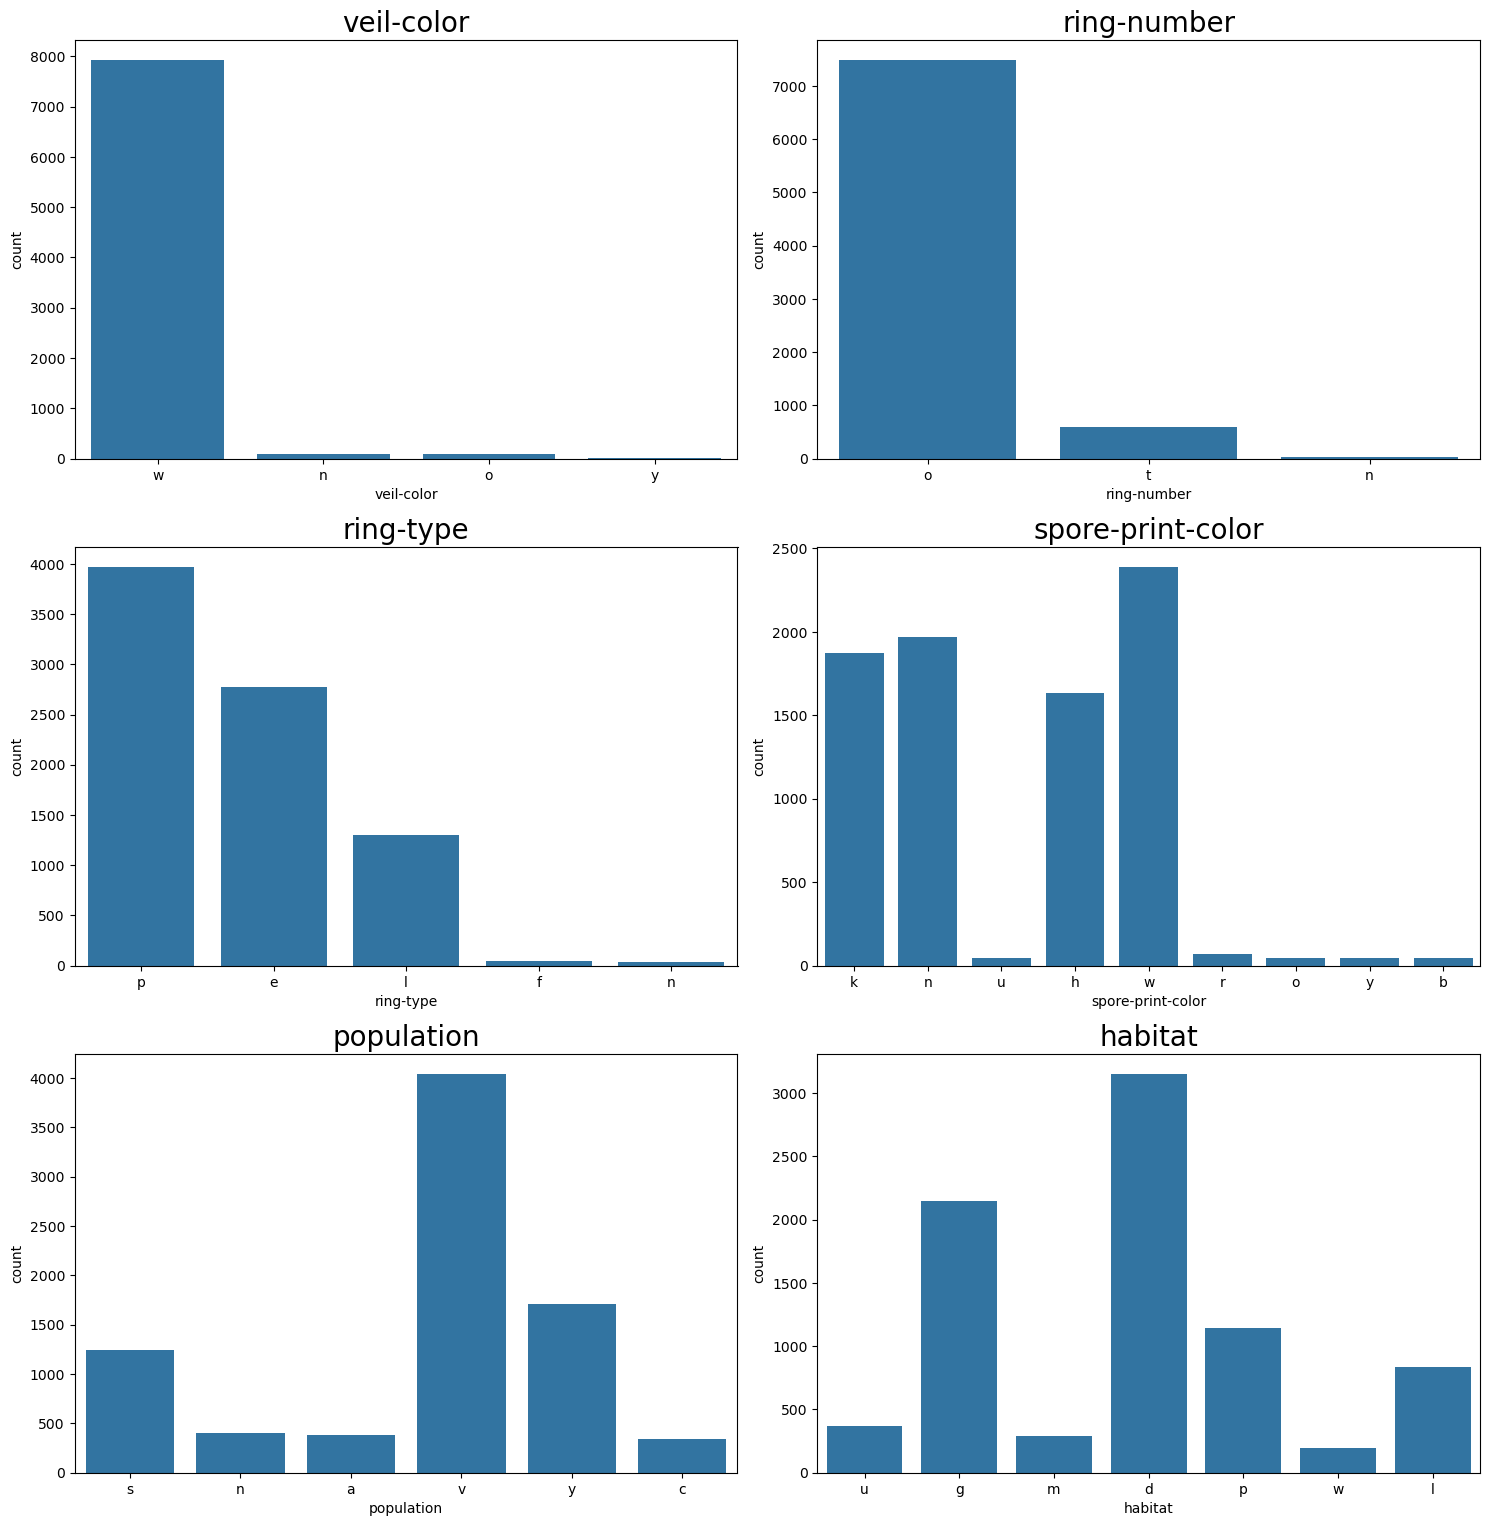

In [25]:
X = df.drop('class', axis=1)
y = df['class']

plt.figure(figsize=(15, 20))

m=1

for col in X.columns:
  plt.subplot(4,2,m)

  m+=1
  plt.title(col, fontsize=20)
  sns.countplot(x=col, data=df)

  if m > 8:
    plt.tight_layout()
    plt.show()
    plt.figure(figsize=(15, 20))
    m=1

plt.tight_layout()
plt.show()

We can observe that there are variables such as veil-type or gill-attachment that only have one possible value or of the several possible values, one of them is much more predominant. These characteristics will be eliminated when training the model to speed up learning process and avoid under-fitting or over-fitting problems.

## Helper Functions for Evaluation

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, precision_recall_curve

def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap=plt.cm.Purples)
    plt.show()

def plot_roc_auc(y_true, y_probs):
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    auc_score = roc_auc_score(y_true, y_probs)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

def plot_precision_recall(y_true, y_probs):
    precision, recall, _ = precision_recall_curve(y_true, y_probs)
    plt.figure()
    plt.plot(recall, precision, color='blue', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()

# Encoding

I am going to separate the variables into two types: those that are ordinal and those that are not. This way, we can use more appropriate encoding methods for each type of variable. In this case, for the non-ordinal variables I am going to apply Frequency Encoding instead of applying the typical OneHotEncoding, since many of the variables have a multitude of different values ​​and this would generate a dataset with too many columns. Having fewer columns speeds up the training process and can improve the interpretability of the results.

As for the Frequency Encoder, it is simply a matter of replacing the specific value of the variable with the percentage of times it appears in the data set.

I will be implementing my own Frequency Encoder, since scikit learn doesn't support it. Key concepts are:

- BaseEstimator is used to simplify the creation of objects to be compatible with the Scikit-Learn API. 

- TransformerMixin is used to create custom transformers. Automatically provides a fit_transform method, which combines the fit and transform steps. This is useful for transformers in pipelines.

In [27]:

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin

class FrequencyEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns 
        self.frequency_maps = {}
    
    def fit(self, X, y = None):
        if self.columns is None:
            self.columns = X.columns
        
        for col in self.columns:
            self.frequency_maps[col] = X[col].value_counts() / len(X)
        return self
    
    def transform(self, X):
        X = X.copy()
        for col in self.columns:
            X[col] = X[col].map(self.frequency_maps[col]).fillna(0)
        return X


ordinal_columns = ['ring-number']
ordinal_categories = [['n', 'o', 't']]

non_ordinal_columns = list(X.columns.drop(ordinal_columns))


# Feature Selection

To select the most relevant features I am going to use a technique based on information gain, or also known as mutual information.

Mutual information between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

This method attempts to estimate mutual information for a discrete target variable, in our case it's the 'case' variable, which can take values of 0 (poisonous) or 1 (edible) once it is encoded.

SelectKBest will be used to select the best features based on the result given by mutual_information_classification. SelectKBest also only opperates on training data, so we avoid data leaking.

In [28]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Models

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC

# Pipeline


I will be automating all steps above into a Pipeline. Note that the pipeline treats training and testing data correctly without introducing data leaking.

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2)


ordinal_preprocessor = OrdinalEncoder(categories= ordinal_categories)
non_ordinal_preprocessor = FrequencyEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', ordinal_preprocessor, ordinal_columns),
        ('non_ordinal', non_ordinal_preprocessor, non_ordinal_columns)
    ]
)

I will be using GridSearchCV for hiperparameter tuning and cross-validation.

In [31]:
# List of classifiers
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(probability=True),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier()
}

# And their corresponding hyperparameters to be evaluated in GridSearch
model_param_grids = {
    'Random Forest': {
        'feature_selection__k': [10, 15, 20],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20]
    },
    'Logistic Regression': {
        'feature_selection__k': [10, 15, 20],
        'classifier__C': [0.1, 1.0, 10.0],
        'classifier__penalty': ['l2']
    },
    'SVM': {
        'feature_selection__k': [10, 15, 20],
        'classifier__C': [0.1, 1.0, 10.0],
        'classifier__kernel': ['linear', 'rbf']
    },
    'Gradient Boosting': {
        'feature_selection__k': [10, 15, 20],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.2]
    },
    'KNN': {
        'feature_selection__k': [10, 15, 20],
        'classifier__n_neighbors': [3, 5, 10],
        'classifier__weights': ['uniform', 'distance']
    }
}


### Be aware of the following:
The execution of the following cell may take several minutes due to the large number of iterations. Estimated time ~7 min

Training Random Forest...
Best parameters for Random Forest: {'classifier__max_depth': None, 'classifier__n_estimators': 50, 'feature_selection__k': 10}
Best cross-validation score for Random Forest: 1.0


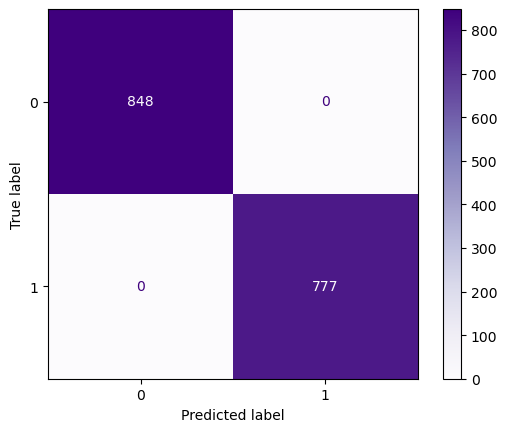

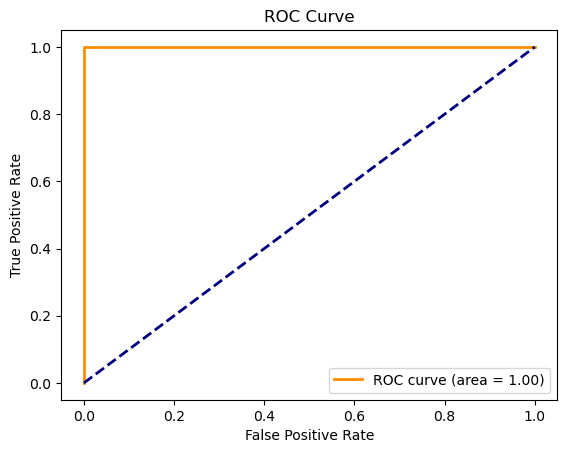

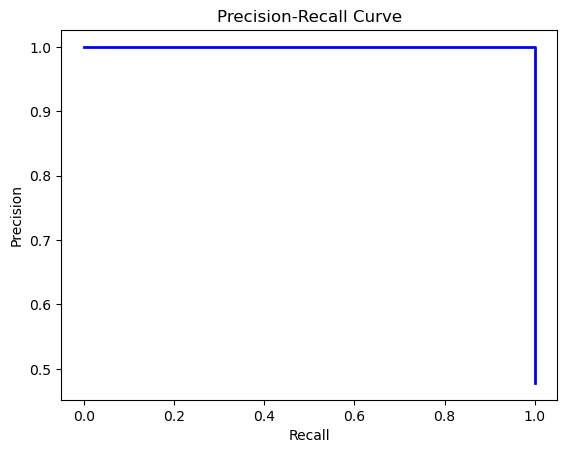

Training Logistic Regression...
Best parameters for Logistic Regression: {'classifier__C': 10.0, 'classifier__penalty': 'l2', 'feature_selection__k': 20}
Best cross-validation score for Logistic Regression: 0.9867667436489608


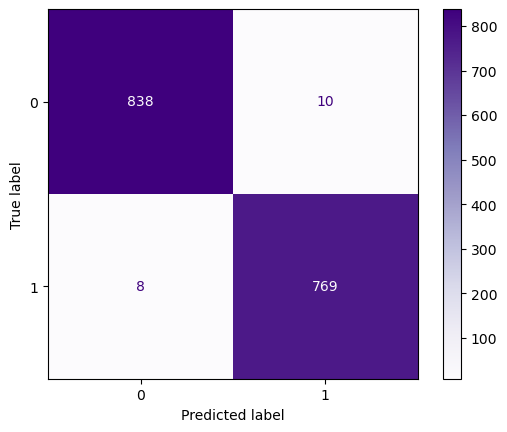

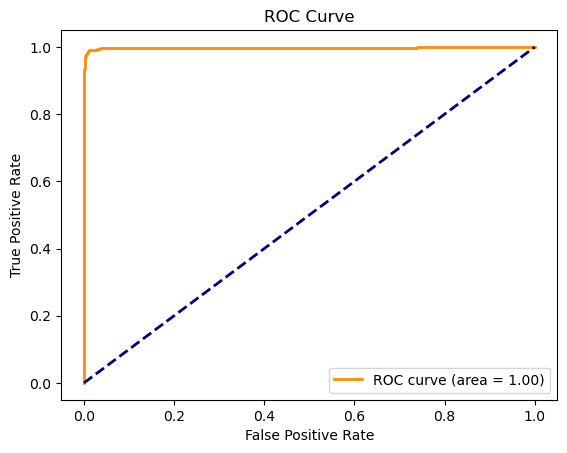

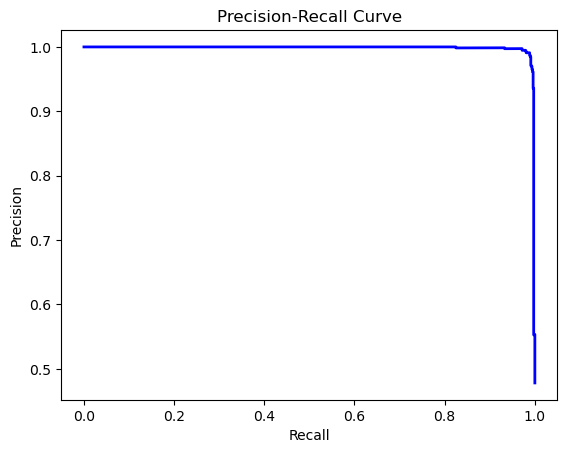

Training SVM...
Best parameters for SVM: {'classifier__C': 1.0, 'classifier__kernel': 'rbf', 'feature_selection__k': 15}
Best cross-validation score for SVM: 1.0


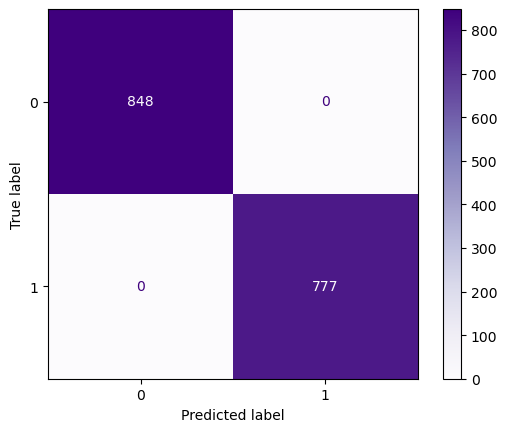

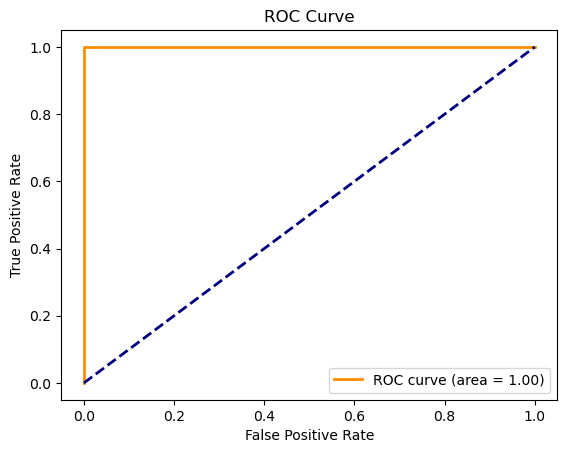

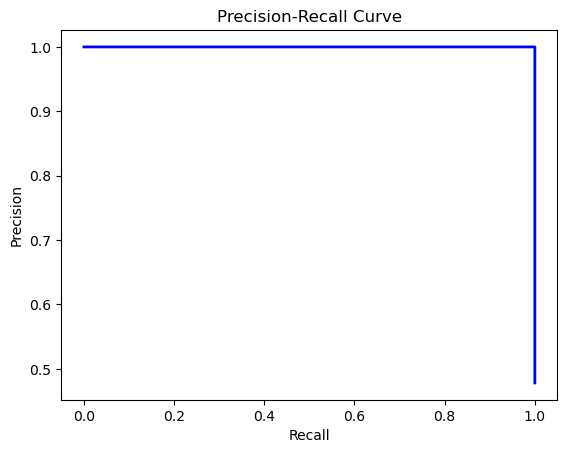

Training Gradient Boosting...
Best parameters for Gradient Boosting: {'classifier__learning_rate': 0.1, 'classifier__n_estimators': 100, 'feature_selection__k': 10}
Best cross-validation score for Gradient Boosting: 1.0


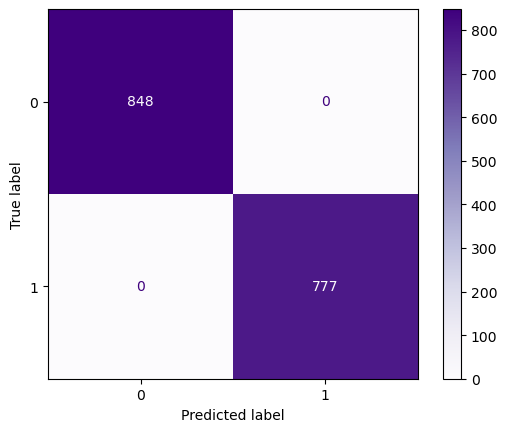

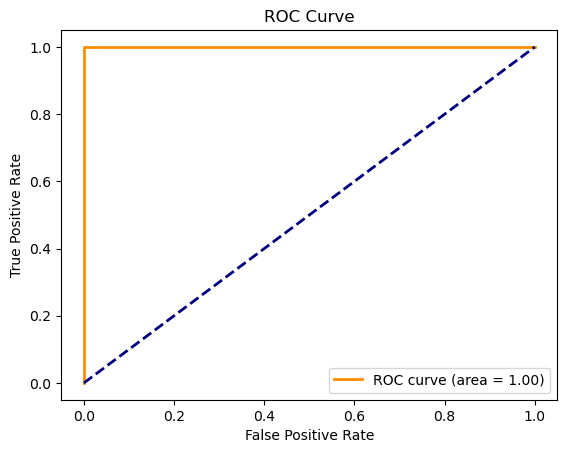

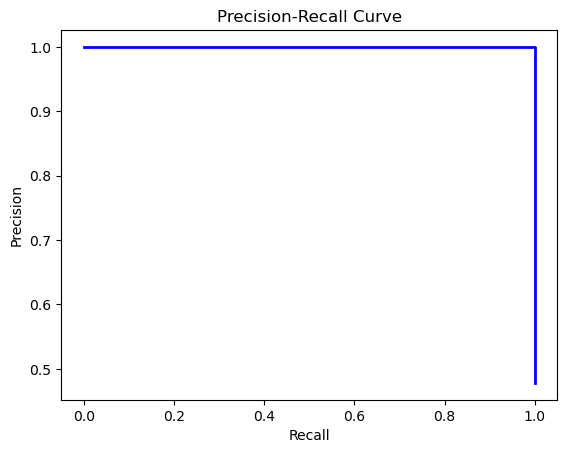

Training KNN...
Best parameters for KNN: {'classifier__n_neighbors': 3, 'classifier__weights': 'uniform', 'feature_selection__k': 10}
Best cross-validation score for KNN: 1.0


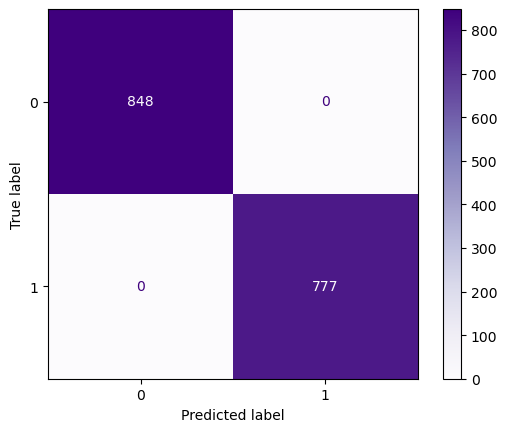

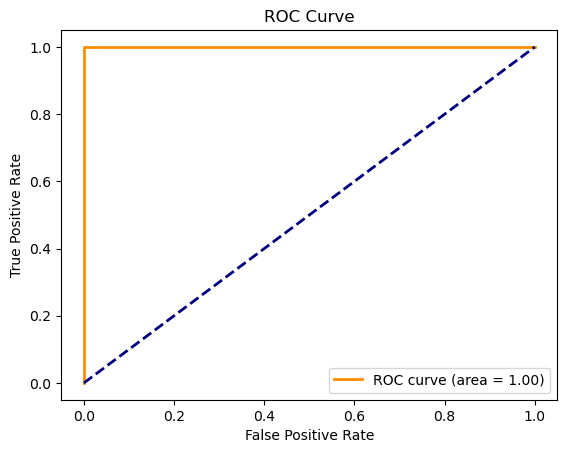

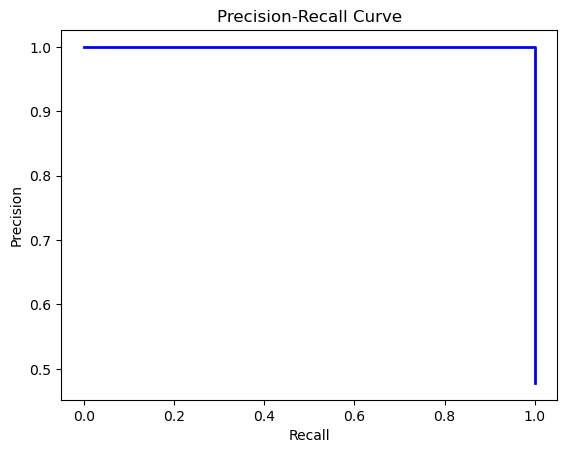

In [32]:
for model_name, model in models.items():
    print(f'Training {model_name}...')
    
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('scale', StandardScaler()),
        ('feature_selection', SelectKBest(score_func=mutual_info_classif, k=10)),
        ('classifier', model)
    ])

    param_grid = model_param_grids.get(model_name, {})

    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    print(f'Best parameters for {model_name}:', grid_search.best_params_)
    print(f'Best cross-validation score for {model_name}:', grid_search.best_score_)

    y_pred = grid_search.best_estimator_.predict(X_test)
    y_probs = grid_search.best_estimator_.predict_proba(X_test)[:, 1] if hasattr(grid_search.best_estimator_, 'predict_proba') else None

    # Evaluate the model
    plot_confusion_matrix(y_test, y_pred, labels=grid_search.classes_)
    if y_probs is not None:
        plot_roc_auc(y_test, y_probs)
        plot_precision_recall(y_test, y_probs)

All models work perfectly, except the LogisticRegression model. This is because this model applies regularization above the defined feature selection step, causing it to train with fewer features than expected, therefore, giving slightly inferior results.

As for the other models, these achieve a perfect classification. This may be because the dataset we have is very complete and the problem of classifying mushrooms is not highly complex. In fact, we have been able to identify poisonous mushrooms throughout human history without having to rely on artificial intelligence.

# Comparing performance with worst models

In the next example we can observe that a badly configured model can still perform pretty well on the test set, despite not achieving a perfect classification.

In [34]:
from sklearn.metrics import accuracy_score

pipeline2 = Pipeline([
        ('preprocessor', preprocessor),
        ('scale', StandardScaler()),
        ('feature_selection', SelectKBest(score_func=mutual_info_classif, k=10)),
        ('classifier', KNeighborsClassifier(n_neighbors=200))
    ])

pipeline2.fit(X_train, y_train)

y_pred = pipeline2.predict(X_test)

acc = accuracy_score(y_pred, y_test)

print(f'KNN accuracy with {200} neighbors: {acc}')

KNN accuracy with 200 neighbors: 0.940923076923077


Next we are going to see how the model performs with a very small training set.

In [78]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y_encoded, test_size=0.96)

pipeline2.fit(X_train2, y_train2)

y_pred = pipeline2.predict(X_test2)

acc = accuracy_score(y_pred, y_test2)
print(f'KNN accuracy with {200} neighbors and small training set: {acc}')

KNN accuracy with 200 neighbors and small training set: 0.7070512820512821


# Conclusion

Correctly tuning the hyperparameters of machine learning models and ensuring sufficient training data are critical for achieving high performance for this problem. Hyperparameter optimization, such as adjusting the number of features, tree depth, learning rate, or kernel functions, enables models to better capture the underlying patterns in the data while avoiding overfitting or underfitting.

Moreover, preprocessing steps such as careful encoding of categorical variables and the selection of relevant features significantly impact the models' predictive capabilities. For this problem, using techniques like mutual information for feature selection and grid search for hyperparameter tuning ensures that the model is both efficient and accurate.